In [4]:

import csv, math
from matplotlib import pyplot as plt 
import numpy as np 

In [5]:
# csv file headers
numCount_header = "Number Count"
numIterations_header = "Num of Iterations"
avgTime_header= "Average Time"
stdTime_header= "Std"

csvHeaders = [numCount_header, numIterations_header, avgTime_header, stdTime_header]

In [6]:
# raspi data

data_raspi = {header:[] for header in csvHeaders}
with open('raspberry-pi/py3-fibotest-rpi4.csv') as csvFile:
    csvReader = csv.DictReader(csvFile)
    for row in csvReader:
        for header in csvHeaders:
            data_raspi[header].append(float(row[header]))

for header in csvHeaders:
    data_raspi[header] = np.array(data_raspi[header])

print(data_raspi)

{'Number Count': array([  1000.,   2000.,   5000.,  10000.,  20000.,  50000., 100000.,
       200000., 500000.]), 'Num of Iterations': array([100., 100., 100., 100., 100., 100., 100., 100., 100.]), 'Average Time': array([4.324e-04, 9.500e-04, 2.880e-03, 7.700e-03, 2.306e-02, 1.092e-01,
       4.104e-01, 1.487e+00, 8.782e+00]), 'Std': array([5.510e-05, 1.586e-05, 1.102e-05, 3.276e-05, 2.788e-04, 1.773e-03,
       4.256e-02, 1.707e-03, 5.170e-02])}


In [7]:
# udoo bolt data

data_udoobolt = {header:[] for header in csvHeaders}
with open('udoo-bolt/py3-fibotest-boltv3.csv') as csvFile:
    csvReader = csv.DictReader(csvFile)
    for row in csvReader:
        for header in row:
            data_udoobolt[header].append(float(row[header]))
for header in csvHeaders:
    data_udoobolt[header] = np.array(data_udoobolt[header])

print(data_udoobolt)

{'Number Count': array([  1000.,   2000.,   5000.,  10000.,  20000.,  50000., 100000.,
       200000., 500000.]), 'Num of Iterations': array([100., 100., 100., 100., 100., 100., 100., 100., 100.]), 'Average Time': array([1.810e-04, 4.621e-04, 1.272e-03, 3.501e-03, 8.742e-03, 4.366e-02,
       1.224e-01, 4.179e-01, 2.473e+00]), 'Std': array([3.762e-05, 8.352e-05, 2.545e-04, 6.526e-04, 1.776e-03, 6.448e-03,
       1.899e-02, 5.182e-03, 5.315e-03])}


<ipython-input-8-bf04dce0aa16>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


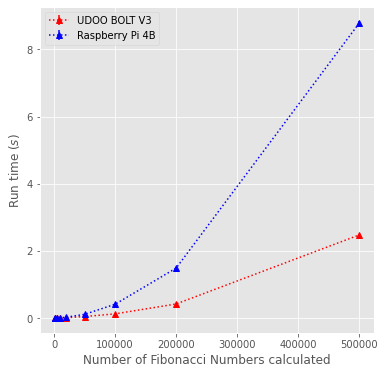

In [8]:
# plotter
plt.style.use("ggplot")
fig = plt.figure(figsize=[6,6])

axis = fig.add_subplot()
#axis.title("Fibonacci Benchmark")

axis.errorbar(x=data_udoobolt[numCount_header], y=data_udoobolt[avgTime_header], yerr=data_udoobolt[stdTime_header], fmt='r^:', label='UDOO BOLT V3')
axis.errorbar(x=data_raspi[numCount_header], y=data_raspi[avgTime_header], yerr=data_raspi[stdTime_header], fmt='b^:', label='Raspberry Pi 4B')
#plt.xscale("log")
#plt.yscale("log")
axis.set_xlabel('Number of Fibonacci Numbers calculated')
axis.set_ylabel('Run time ($s$)')
axis.legend()

fig.show()
fig.savefig('fibo.pdf')

In [9]:
print("Difference between results: Udoo_performance is better than Raspi_performance by a factor of {}, avg={:.3f} +- {:.3f} ".format(
    "(" + ", ".join("{:.4f}".format(s) for s in 1/np.divide(data_udoobolt[avgTime_header], data_raspi[avgTime_header]))+ ")"
    , float(np.average(1/np.divide(data_udoobolt[avgTime_header], data_raspi[avgTime_header]))), 
    float(np.std(1/np.divide(data_udoobolt[avgTime_header], data_raspi[avgTime_header])))))

Difference between results: Udoo_performance is better than Raspi_performance by a factor of (2.3890, 2.0558, 2.2642, 2.1994, 2.6378, 2.5011, 3.3529, 3.5583, 3.5512), avg=2.723 +- 0.566 


In [10]:
# export to latex
# ...